In [25]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns

In [26]:
def make_df(data):
    df = pd.read_csv(data,encoding = 'cp949')
    df_dr = df.drop('구분(4)', axis = 1)
    
    df_re1 = df_dr.iloc[:,:].replace('\*\*', '', regex=True)
    df_re2 = df_re1.iloc[:,:].replace('\*', '', regex=True)
    df_re3 = df_re2.replace('-', np.nan)
    
    col_list = ['2022.01', '2022.02','2022.03','2022.04','2022.05','2022.06','2022.07','2022.08','2022.09','2022.10','2022.11']
    for i in col_list:
        df_re3[i] = pd.to_numeric(df_re3[i], errors='coerce').astype('Int64')
    
    df_re3.rename(columns = {'구분(1)':'구분','구분(2)':'행정구역','구분(3)':'지역명'}, inplace = True)
    
    return df_re3

In [27]:
base_df = make_df('data 2/미세먼지_PM2.5__월별_대기오염도_측정망별_시도별_도시별_측정지점별__20230516222441.csv')

In [28]:
base_df

,구분,행정구역,지역명,2022.01,2022.02,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11
0,도시대기,서울,중구,31,27,21,22,17,12,17,12,11,14,24
1,도시대기,서울,종로구,32,28,22,22,17,12,16,12,12,13,23
2,도시대기,서울,중랑구,27,24,20,21,16,12,17,13,11,14,23
3,도시대기,서울,동대문구,31,25,22,22,16,13,17,16,12,14,22
4,도시대기,서울,은평구,28,27,25,27,22,17,18,12,11,11,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,도로변대기,경남,창원,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,14,19
624,도로변대기,경남,창원,14,13,15,11,13,7,10,9,8,12,19
625,도로변대기,경남,김해,21,18,19,15,18,11,16,14,12,12,21
626,도로변대기,경남,시도평균,18,15,17,13,15,10,13,11,10,12,20


In [29]:
def filter_df(df):

    df_at_city = df[df['구분'].str.contains('도시대기')]
    df_at_road = df[df['구분'].str.contains('도로변대기')]
    
    return df_at_city, df_at_road 

In [30]:
city, road = filter_df(base_df)

In [31]:
city

,구분,행정구역,지역명,2022.01,2022.02,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11
0,도시대기,서울,중구,31,27,21,22,17,12,17,12,11,14,24
1,도시대기,서울,종로구,32,28,22,22,17,12,16,12,12,13,23
2,도시대기,서울,중랑구,27,24,20,21,16,12,17,13,11,14,23
3,도시대기,서울,동대문구,31,25,22,22,16,13,17,16,12,14,22
4,도시대기,서울,은평구,28,27,25,27,22,17,18,12,11,11,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,도시대기,제주,서귀포,14,17,16,13,12,9,10,7,9,6,11
517,도시대기,제주,서귀포,16,17,21,17,13,9,12,7,13,11,17
518,도시대기,제주,서귀포,15,18,17,14,13,10,11,7,13,13,17
519,도시대기,제주,서귀포,14,16,17,14,13,10,8,7,16,8,12


In [32]:
city_gr = city.groupby('행정구역').mean()

In [33]:
city_gr['평균'] = city_gr.sum(axis = 1)/11

In [34]:
city_gr

,2022.01,2022.02,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11,평균
행정구역,,,,,,,,,,,,
강원,23.956522,21.652174,19.916667,16.454545,14.458333,10.5,8.75,8.333333,7.5,9.25,17.833333,14.418628
경기,30.53271,26.654206,23.925234,22.351852,17.321101,12.669725,14.944954,10.440367,12.12844,16.453704,25.309091,19.339217
경남,19.868421,17.736842,18.052632,14.368421,15.947368,10.810811,12.351351,10.342857,10.428571,11.789474,18.763158,14.587264
경북,22.326087,20.869565,21.891304,16.177778,16.23913,12.23913,11.659574,9.785714,10.142857,13.186047,23.0,16.137926
광주,23.454545,24.363636,20.818182,16.909091,16.0,11.818182,11.818182,8.818182,12.545455,14.363636,21.0,16.537190
대구,23.944444,21.555556,22.0,16.526316,16.473684,11.736842,11.947368,9.368421,9.105263,12.157895,23.166667,16.180223
대전,25.454545,23.545455,23.545455,17.636364,14.727273,10.272727,12.454545,7.909091,10.090909,13.636364,23.636364,16.628099
부산,21.142857,19.464286,20.928571,15.535714,17.464286,10.357143,11.892857,10.071429,9.785714,10.964286,19.428571,15.185065
서울,28.84,25.52,21.2,21.8,16.88,12.4,16.08,11.44,11.56,13.88,22.2,18.345455


In [35]:
def make_gr(df):
    
    plt.style.use('seaborn')
    plt.rcParams['font.family'] = 'AppleGothic'
    plt.figure(figsize=(30, 20))
    plt.xticks(rotation = 90, fontsize = 40)

    sns.barplot(x = df.index, y = '평균', data = df)

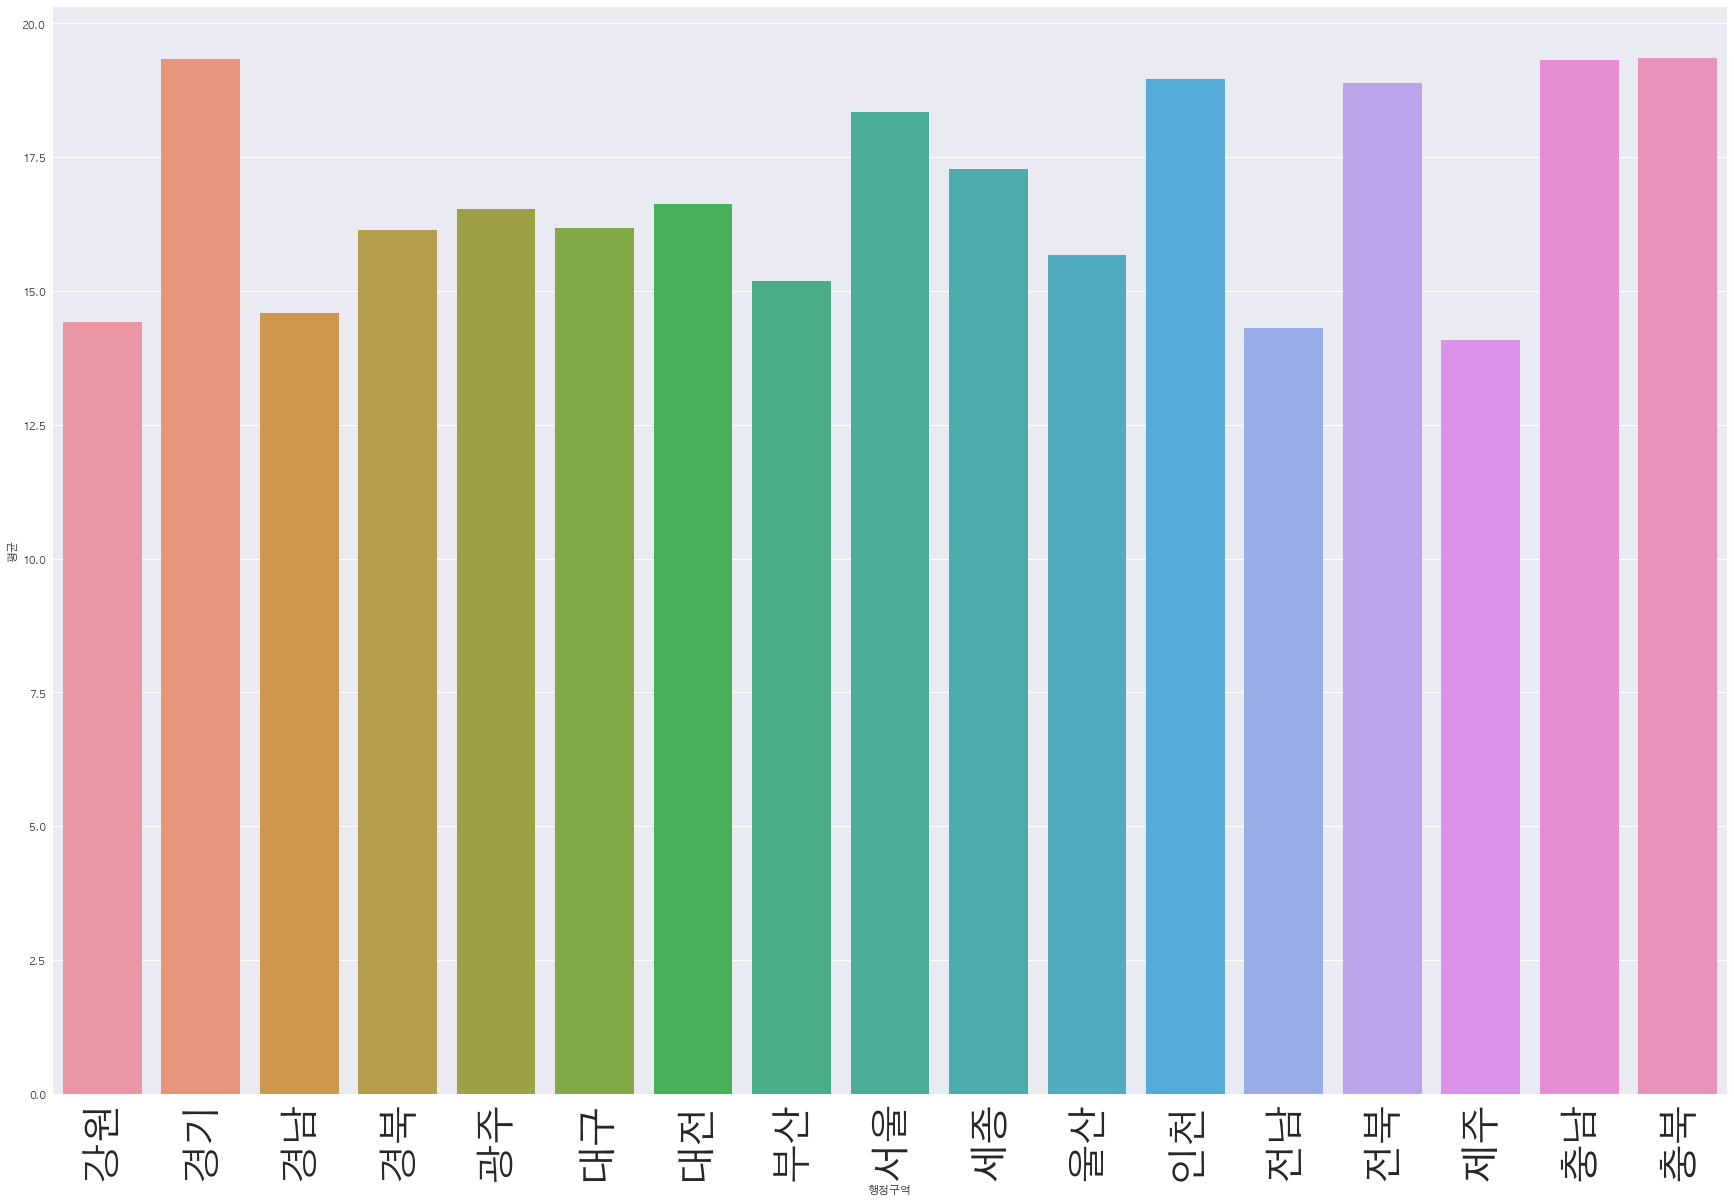

In [36]:
make_gr(city_gr)

In [17]:
def select(df,date):
    city_gr = df.groupby('행정구역').mean()
    
    sort_df = city_gr.sort_values('행정구역',ascending = True)
    
    return sort_df
    

In [18]:
select(road,'2022.11')['2022.01']

행정구역
강원         32.0
경기    28.583333
경남    17.666667
경북         22.0
광주         25.0
대구         28.0
대전    24.333333
부산    20.666667
서울      28.9375
세종         26.0
울산         17.0
인천    30.857143
전북         25.0
제주         17.0
충남         38.0
충북         33.0
Name: 2022.01, dtype: Float64

In [16]:
road_gr = city.groupby('행정구역').mean()